In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

np.random.seed(42)
n = 100_000
# Generate dummy data
data = pd.DataFrame({
    'Age': np.random.normal(35, 10, n).round().astype(float),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n, p=[0.48, 0.48, 0.04]),
    'Income': np.random.normal(60000, 15000, n).round(2),
    'Education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD', None], n, p=[0.3, 0.4, 0.2, 0.05, 0.05])
})

# Introduce missing values randomly
missing_age_idx = np.random.choice(n, size=int(0.1*n), replace=False)  # 10% missing Age
missing_gender_idx = np.random.choice(n, size=int(0.05*n), replace=False)  # 5% missing Gender
missing_income_idx = np.random.choice(n, size=int(0.15*n), replace=False)  # 15% missing Income
missing_education_idx = np.random.choice(n, size=int(0.1*n), replace=False)  # 10% missing Education

data.loc[missing_age_idx, 'Age'] = np.nan
data.loc[missing_gender_idx, 'Gender'] = np.nan
data.loc[missing_income_idx, 'Income'] = np.nan
data.loc[missing_education_idx, 'Education'] = np.nan

data.shape


(100000, 4)

In [3]:
dff =data

In [4]:
data.head()

,Age,Gender,Income,Education
0,40.0,Male,56836.33,High School
1,34.0,Female,71832.13,Masters
2,41.0,Male,NaN,NaN
3,NaN,Female,58224.80,Bachelors
4,33.0,Male,NaN,Bachelors


In [5]:
data.isnull().sum()

Age          10000
Gender        5000
Income       15000
Education    14449
dtype: int64

### Mean Median and Mode

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


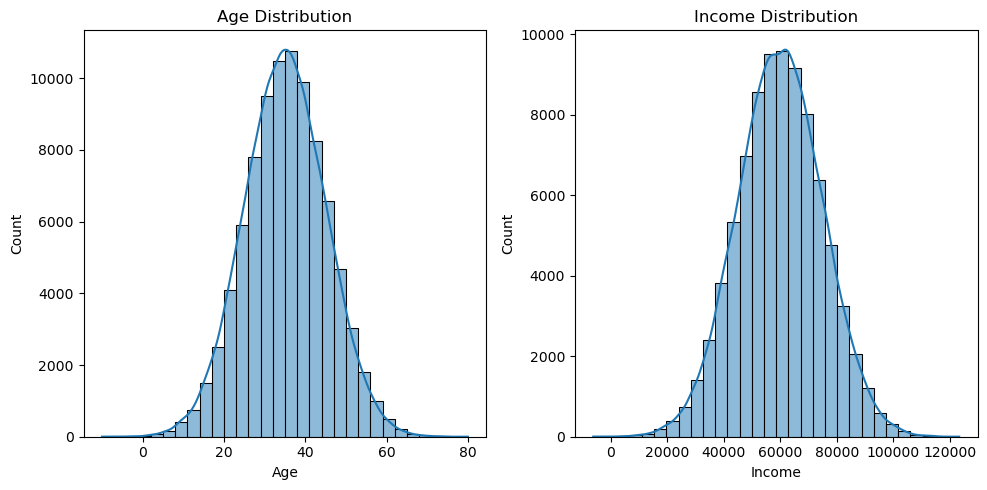

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

# Plot 1 - Histogram of Age
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot 3 - Histogram of Income
sns.histplot(data['Income'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

plt.tight_layout()
plt.show()

#### as mean median and mode is fairly similar any one works 

In [7]:
data["MMM_Age"] = data["Age"].fillna(data["Age"].mean())
#data["Age"].fillna(data["Age"].median(),inplace =True) -> when skewed 
#data["Age"].fillna(data["Age"].mode(),inplace =True) --> normalize better 

In [8]:
data["MMM_Income"] = data["Income"].fillna(data["Income"].mean())
# data["Income"].fillna(data["Income"].median(),inplace =True) --> when skewed 
# data["Income"].fillna(data["Income"].mode(),inplace =True) --> normalize better 

In [9]:
data.isnull().sum()

Age           10000
Gender         5000
Income        15000
Education     14449
MMM_Age           0
MMM_Income        0
dtype: int64

#### after imputation plot

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


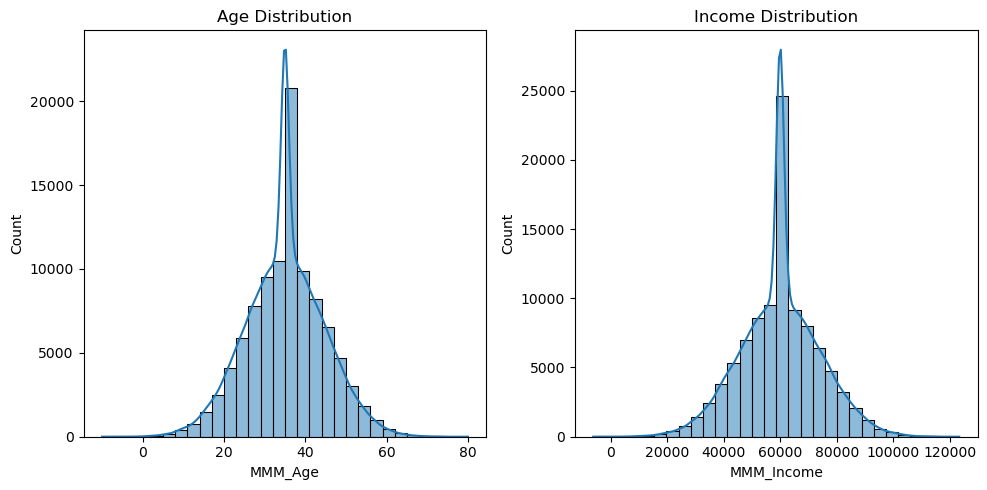

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns

# Plot 1 - Histogram of Age
sns.histplot(data['MMM_Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# Plot 3 - Histogram of Income
sns.histplot(data['MMM_Income'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Income Distribution')

plt.tight_layout()
plt.show()

### KNN IMPUTE

In [11]:
from sklearn.impute import KNNImputer

In [12]:
knnimp = KNNImputer()

In [13]:
data["KNN_Age"] =knnimp.fit_transform(data[["Age"]])
data["KNN_Income"] =knnimp.fit_transform(data[["Income"]])

In [14]:
data.head()

,Age,Gender,Income,Education,MMM_Age,MMM_Income,KNN_Age,KNN_Income
0,40.0,Male,56836.33,High School,40.000000,56836.330000,40.000000,56836.330000
1,34.0,Female,71832.13,Masters,34.000000,71832.130000,34.000000,71832.130000
2,41.0,Male,NaN,NaN,41.000000,59933.553305,41.000000,59933.553305
3,NaN,Female,58224.80,Bachelors,35.008978,58224.800000,35.008978,58224.800000
4,33.0,Male,NaN,Bachelors,33.000000,59933.553305,33.000000,59933.553305


C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

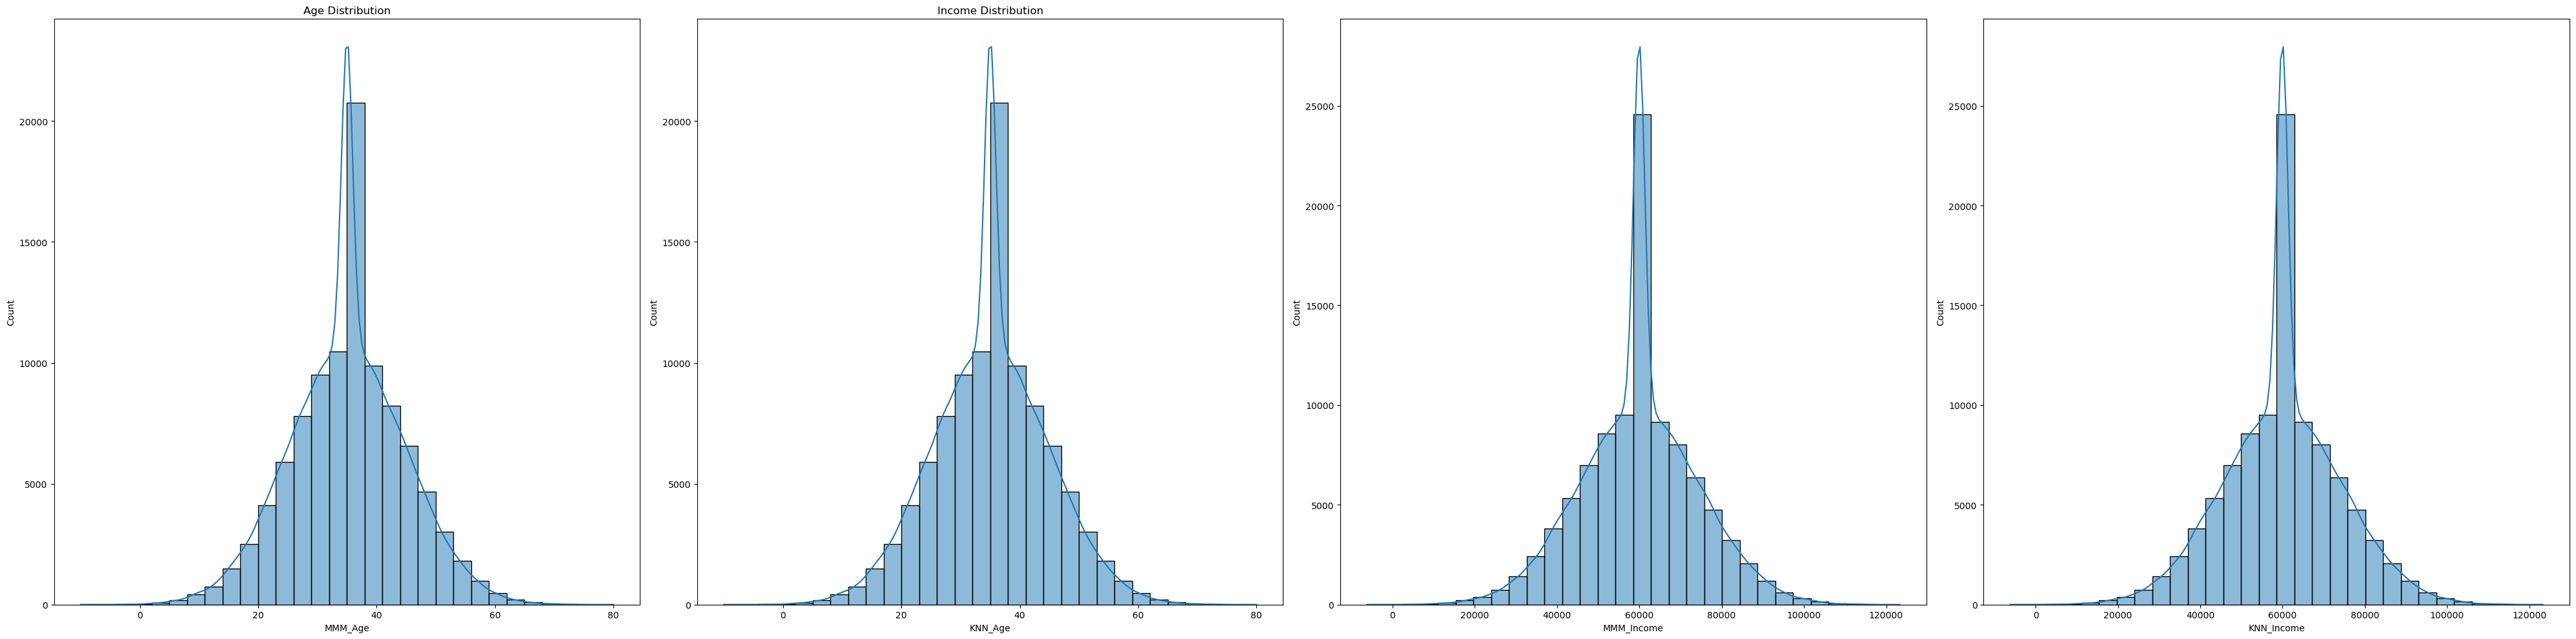

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(40, 10))  # 1 row, 3 columns

# Plot 1 - Histogram of Age
sns.histplot(data['MMM_Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data['KNN_Age'], bins=30, kde=True, ax=axes[1])
axes[0].set_title('Age Distribution')

# Plot 3 - Histogram of Income
sns.histplot(data['MMM_Income'], bins=30, kde=True, ax=axes[2])
axes[1].set_title('Income Distribution')

sns.histplot(data['KNN_Income'], bins=30, kde=True, ax=axes[3])
axes[1].set_title('Income Distribution')

plt.tight_layout()
plt.show()

#### knn is bastard yaar

#### MICE now

In [16]:
data.head()

,Age,Gender,Income,Education,MMM_Age,MMM_Income,KNN_Age,KNN_Income
0,40.0,Male,56836.33,High School,40.000000,56836.330000,40.000000,56836.330000
1,34.0,Female,71832.13,Masters,34.000000,71832.130000,34.000000,71832.130000
2,41.0,Male,NaN,NaN,41.000000,59933.553305,41.000000,59933.553305
3,NaN,Female,58224.80,Bachelors,35.008978,58224.800000,35.008978,58224.800000
4,33.0,Male,NaN,Bachelors,33.000000,59933.553305,33.000000,59933.553305


In [17]:
from sklearn.experimental import enable_iterative_imputer  # enable experimental feature
from sklearn.impute import IterativeImputer

In [18]:
mice = IterativeImputer(random_state=42)

dfonehot = pd.get_dummies(dff,columns=["Gender","Education"])
# Fit and transform
data_imputed = mice.fit_transform(dfonehot)

# Convert back to DataFrame
data_mice = pd.DataFrame(data_imputed, columns=dfonehot.columns)

data_mice

C:\Users\athar\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Age,Income,MMM_Age,MMM_Income,KNN_Age,KNN_Income,Gender_Female,Gender_Male,Gender_Other,Education_Bachelors,Education_High School,Education_Masters,Education_PhD
0,40.000000,5.683633e+04,40.000000,56836.330000,40.000000,56836.330000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,34.000000,7.183213e+04,34.000000,71832.130000,34.000000,71832.130000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.000000,1.632798e+06,41.000000,59933.553305,41.000000,59933.553305,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-28.991022,5.822480e+04,35.008978,58224.800000,35.008978,58224.800000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33.000000,-4.643544e+05,33.000000,59933.553305,33.000000,59933.553305,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33.000000,6.929071e+04,33.000000,69290.710000,33.000000,69290.710000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99996,29.000000,4.173464e+04,29.000000,41734.640000,29.000000,41734.640000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,39.000000,6.191710e+04,39.000000,61917.100000,39.000000,61917.100000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
99998,33.000000,4.664600e+04,33.000000,46646.000000,33.000000,46646.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data_mice

,Age,Income,MMM_Age,MMM_Income,KNN_Age,KNN_Income,Gender_Female,Gender_Male,Gender_Other,Education_Bachelors,Education_High School,Education_Masters,Education_PhD
0,40.000000,5.683633e+04,40.000000,56836.330000,40.000000,56836.330000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,34.000000,7.183213e+04,34.000000,71832.130000,34.000000,71832.130000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41.000000,1.632798e+06,41.000000,59933.553305,41.000000,59933.553305,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-28.991022,5.822480e+04,35.008978,58224.800000,35.008978,58224.800000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33.000000,-4.643544e+05,33.000000,59933.553305,33.000000,59933.553305,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,33.000000,6.929071e+04,33.000000,69290.710000,33.000000,69290.710000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
99996,29.000000,4.173464e+04,29.000000,41734.640000,29.000000,41734.640000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,39.000000,6.191710e+04,39.000000,61917.100000,39.000000,61917.100000,1.0,0.0,0.0,1.0,0.0,0.0,0.0
99998,33.000000,4.664600e+04,33.000000,46646.000000,33.000000,46646.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

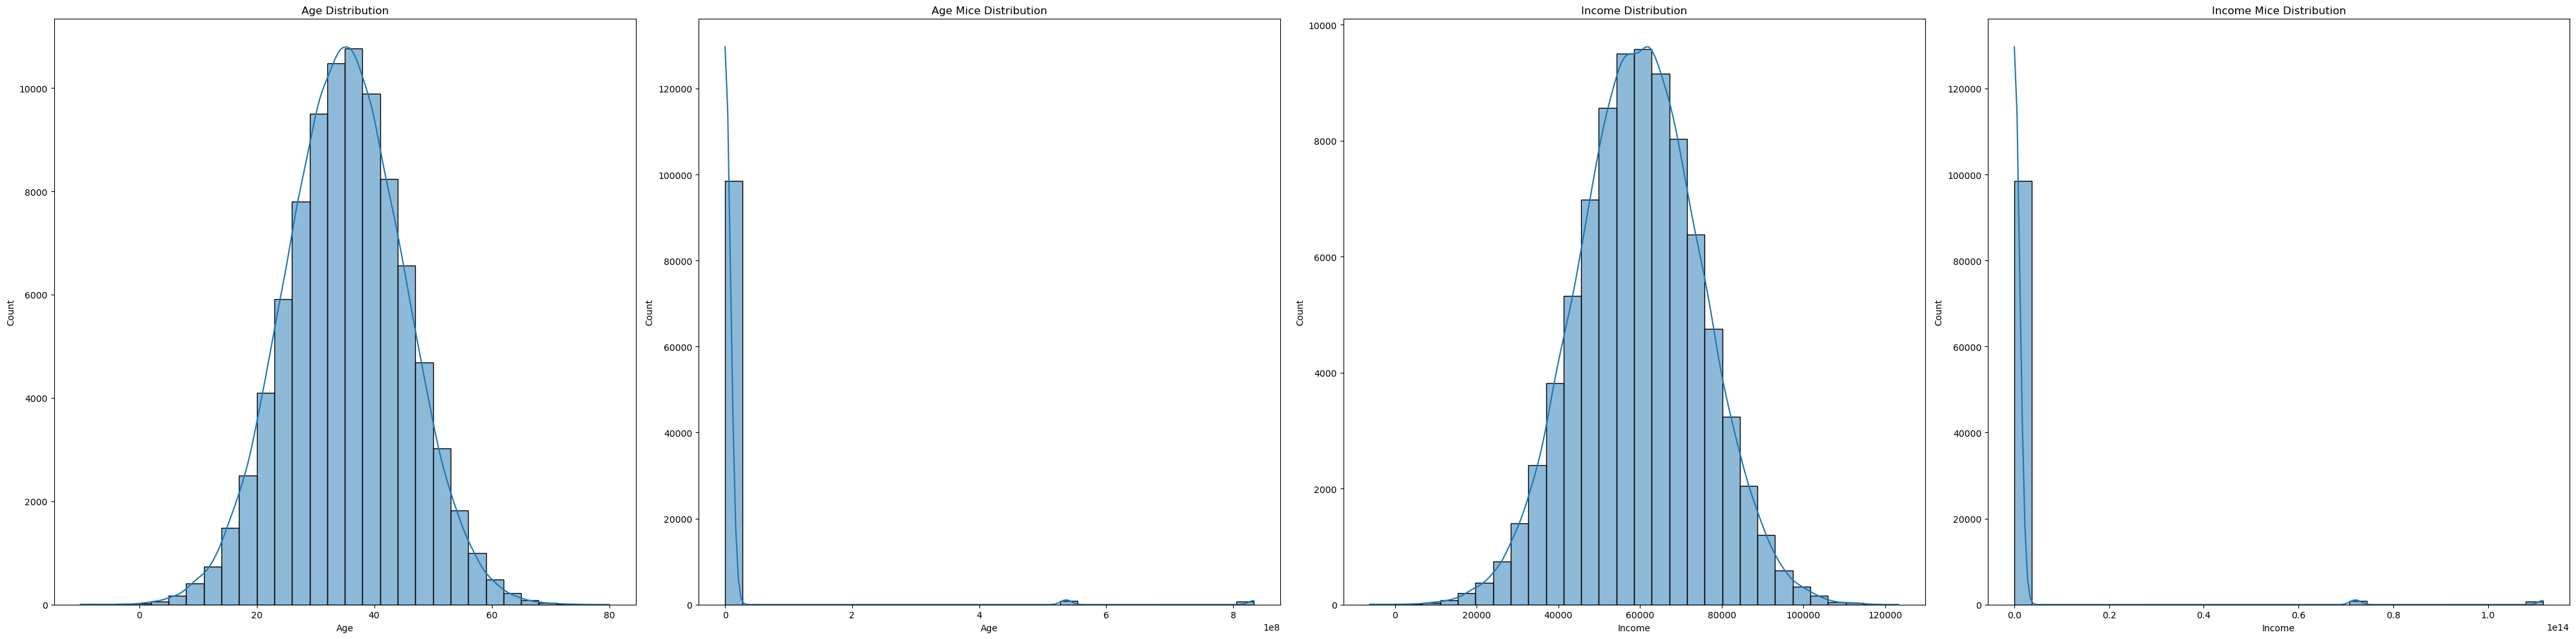

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(40, 10))  # 1 row, 3 columns

# Plot 1 - Histogram of Age
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(data_mice['Age'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Age Mice Distribution')

# Plot 3 - Histogram of Income
sns.histplot(data['Income'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Income Distribution')

sns.histplot(data_mice['Income'], bins=30, kde=True, ax=axes[3])
axes[3].set_title('Income Mice Distribution')

plt.tight_layout()
plt.show()

C:\Users\athar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

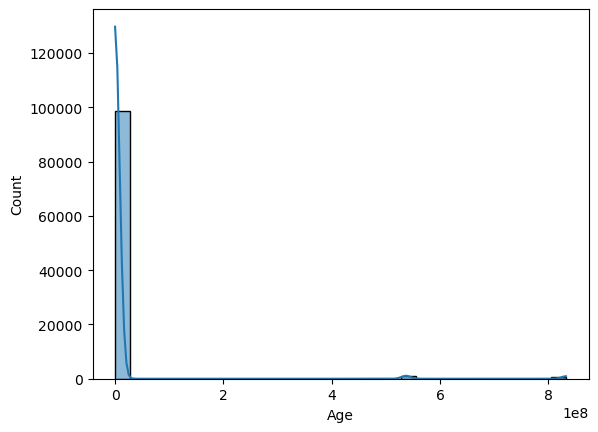

In [24]:
data_mice.loc[data_mice['Age'] < 0, 'Age'] = data['Age'].median()
sns.histplot(data_mice['Age'], bins=30, kde=True)

In [23]:
data_mice['Age'].unique()

array([ 4.00000000e+01,  3.40000000e+01,  4.10000000e+01, -2.89910222e+01,
        3.30000000e+01,  5.10000000e+01, -5.72991022e+02,  3.00000000e+01,
        3.70000000e+01,  1.60000000e+01,  1.80000000e+01,  2.90000000e+01,
        2.50000000e+01, -2.20991022e+02,  2.60000000e+01,  2.10000000e+01,
        5.00000000e+01,  3.60000000e+01,  2.30000000e+01,  3.90000000e+01,
        3.20000000e+01,  5.40000000e+01,  3.50000000e+01,  2.40000000e+01,
        4.30000000e+01,  1.50000000e+01,  2.20000000e+01,  2.59008978e+02,
        8.32398755e+08,  2.00000000e+01,  2.80000000e+01,  4.60000000e+01,
        3.80000000e+01,  1.70000000e+01, -1.24991022e+02,  3.23008978e+02,
        4.50000000e+01, -1.88991022e+02,  2.70000000e+01, -6.09910222e+01,
        9.00000000e+00,  4.40000000e+01, -5.40991022e+02,  3.10000000e+01,
        3.87008978e+02,  6.00000000e+01, -3.00991022e+02, -7.32991022e+02,
        5.70000000e+01, -4.12991022e+02,  1.90000000e+01, -1.56991022e+02,
       -3.96991022e+02,  